In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv('CC_GENERAL.csv')
data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [4]:
data.shape

(8950, 18)

In [5]:
data=data.drop(['CUST_ID'],axis=1)
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [6]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data.MINIMUM_PAYMENTS.fillna(value=data.MINIMUM_PAYMENTS.mean(),inplace=True)

In [8]:
data.CREDIT_LIMIT.fillna(value=data.CREDIT_LIMIT.mean(),inplace=True)

In [9]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

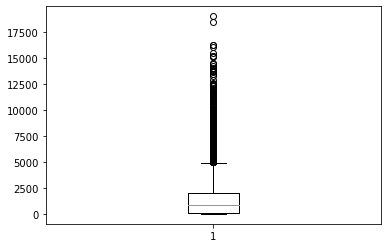

In [10]:
plt.show(plt.boxplot(data.BALANCE))

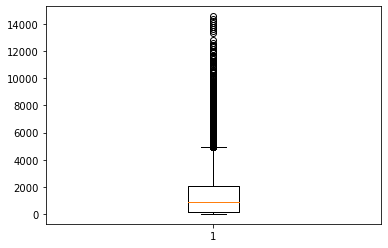

In [11]:
data.drop(data[data.BALANCE>15000].index,inplace=True)
plt.show(plt.boxplot(data.BALANCE))

In [12]:
data.BALANCE.median()+3*data.BALANCE.std()

6956.357812363618

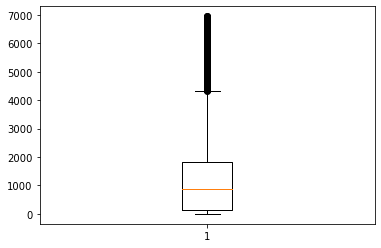

In [13]:
data.loc[data.BALANCE>=data.BALANCE.median()+3*data.BALANCE.std(),'BALANCE']=data.BALANCE.median()
plt.show(plt.boxplot(data.BALANCE))

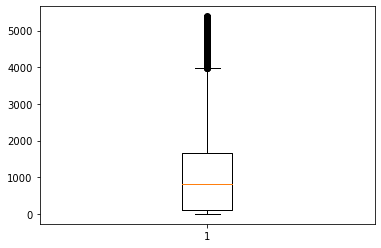

In [14]:
data.drop(data[data.BALANCE>data.BALANCE.median()+3*data.BALANCE.std()].index,inplace=True)
plt.show(plt.boxplot(data.BALANCE))

In [15]:
data[data.BALANCE>4000]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
24    5368.571219           1.000000       0.00              0.00   
37    4047.480828           1.000000    2380.55           1642.17   
42    4104.710798           1.000000     203.82            203.82   
44    5315.945594           1.000000    1525.44            469.80   
50    4931.331857           1.000000     901.42            646.07   
...           ...                ...        ...               ...   
8215  4436.557694           1.000000    6005.90           5838.38   
8284  4302.771935           0.857143       0.00              0.00   
8395  4743.748932           1.000000     399.00              0.00   
8457  4572.797303           1.000000      65.00             65.00   
8584  4696.525962           0.875000     604.33            435.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
24                      0.00    798.949863             0.000000   
37                    738.38   1697.660901             0.750000   
42                      0.00      0.000000             0.083333   
44                   1055.64      0.000000             1.000000   
50                    255.35   8530.648614             0.625000   
...                      ...           ...                  ...   
8215                  167.52    567.971877             1.000000   
8284                    0.00   5875.404159             0.000000   
8395                  399.00   1112.247446             0.666667   
8457                    0.00   5075.019446             0.125000   
8584                  169.33   6400.248453             0.500000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
24                      0.000000                          0.000000   
37                      0.500000                          0.750000   
42                      0.083333                          0.000000   
44                      0.333333                          1.000000   
50                      0.375000                          0.250000   
...                          ...                               ...   
8215                    0.583333                          0.916667   
8284                    0.000000                          0.000000   
8395                    0.000000                          0.583333   
8457                    0.125000                          0.000000   
8584                    0.375000                          0.125000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
24                  0.363636                 4              0        6000.0   
37                  0.333333                 7             41        5000.0   
42                  0.000000                 0              1        4500.0   
44                  0.000000                 0             20        8500.0   
50                  0.875000                37              9       12000.0   
...                      ...               ...            ...           ...   
8215                0.083333                 1             61       10500.0   
8284                0.142857                 5              0        6000.0   
8395                0.166667                 3              8        5000.0   
8457                0.375000                 8              1        5500.0   
8584                0.375000                 7              5        8000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
24    1422.726707       1657.002877               0.0      11  
37    1617.894416       1541.141605               0.0      12  
42     868.275275       1801.264841               0.0      12  
44    1430.341501       1318.714920               0.0      12  
50    8113.297346       1012.415961               0.0       8  
...           ...               ...               ...     ...  
8215  1650.425296       1067.515656               0.0      12  
8284   384.040295       1966.521666               0.0       7  
8395  1259

In [16]:
data.shape

(8658, 17)

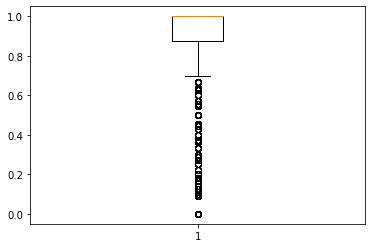

In [17]:
plt.show(plt.boxplot(data.BALANCE_FREQUENCY))

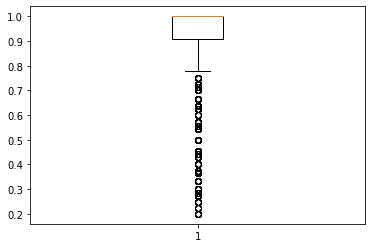

In [18]:
data.drop(data[data.BALANCE_FREQUENCY<0.2].index,inplace=True)
plt.show(plt.boxplot(data.BALANCE_FREQUENCY))

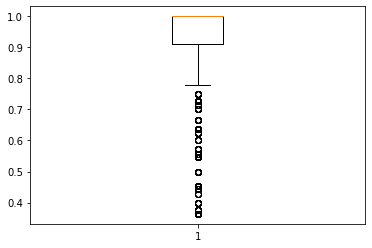

In [19]:
data.loc[data.BALANCE_FREQUENCY<data.BALANCE_FREQUENCY.mean()-3*data.BALANCE_FREQUENCY.std(),'BALANCE_FREQUENCY']=data.BALANCE_FREQUENCY.mean()
plt.show(plt.boxplot(data.BALANCE_FREQUENCY))

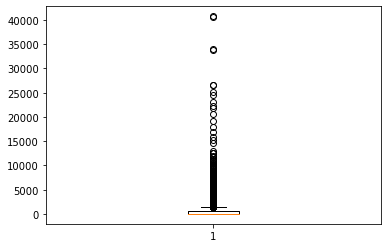

In [20]:
plt.show(plt.boxplot(data.ONEOFF_PURCHASES))

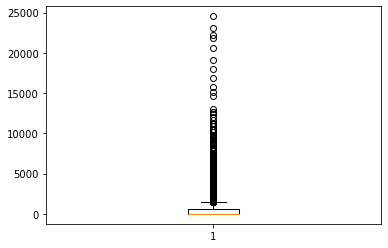

In [21]:
data.drop(data[data.ONEOFF_PURCHASES>25000].index,inplace=True)
plt.show(plt.boxplot(data.ONEOFF_PURCHASES))

In [22]:
data.ONEOFF_PURCHASES.mean()+3*data.ONEOFF_PURCHASES.std()

4650.326611245221

In [23]:
data.loc[data.ONEOFF_PURCHASES>=data.ONEOFF_PURCHASES.mean()+3*data.ONEOFF_PURCHASES.std(),'ONEOFF_PURCHASES']=data.ONEOFF_PURCHASES.mean()
plt.show(plt.boxplot(data.ONEOFF_PURCHASES))

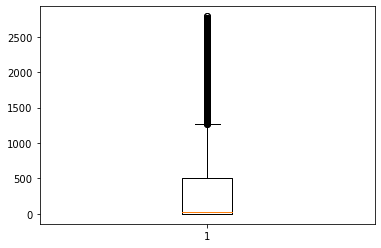

In [24]:
data.drop(data[data.ONEOFF_PURCHASES>data.ONEOFF_PURCHASES.mean()+3*data.ONEOFF_PURCHASES.std()].index,inplace=True)
plt.show(plt.boxplot(data.ONEOFF_PURCHASES))

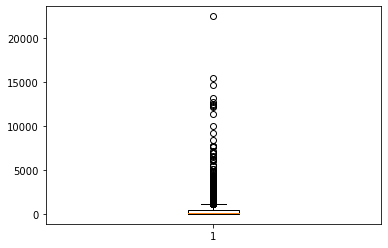

In [25]:
plt.show(plt.boxplot(data.INSTALLMENTS_PURCHASES))

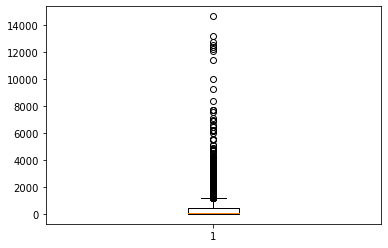

In [26]:
data.drop(data[data.INSTALLMENTS_PURCHASES>15000].index,inplace=True)
plt.show(plt.boxplot(data.INSTALLMENTS_PURCHASES))

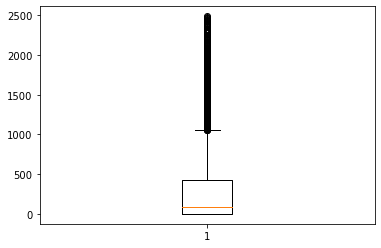

In [27]:
data.loc[data.INSTALLMENTS_PURCHASES>=data.INSTALLMENTS_PURCHASES.median()+3*data.INSTALLMENTS_PURCHASES.std(),'INSTALLMENTS_PURCHASES']=data.INSTALLMENTS_PURCHASES.median()
plt.show(plt.boxplot(data.INSTALLMENTS_PURCHASES))

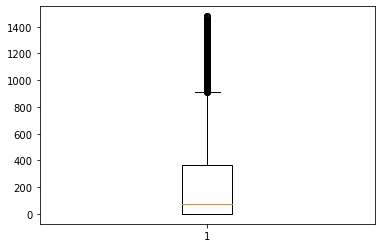

In [28]:
data.drop(data[data.INSTALLMENTS_PURCHASES>data.INSTALLMENTS_PURCHASES.median()+3*data.INSTALLMENTS_PURCHASES.std()].index,inplace=True)
plt.show(plt.boxplot(data.INSTALLMENTS_PURCHASES))

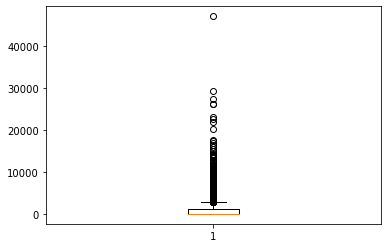

In [29]:
plt.show(plt.boxplot(data.CASH_ADVANCE))

In [30]:
data.drop(data[data.CASH_ADVANCE>25000].index,inplace=True)
plt.show(plt.boxplot(data.CASH_ADVANCE))

In [31]:
data.CASH_ADVANCE.median()+3*data.CASH_ADVANCE.std()

5544.463465178774

In [32]:
data.loc[data.CASH_ADVANCE>=data.CASH_ADVANCE.mean()+3*data.CASH_ADVANCE.std(),'CASH_ADVANCE']=data.CASH_ADVANCE.mean()
plt.show(plt.boxplot(data.CASH_ADVANCE))

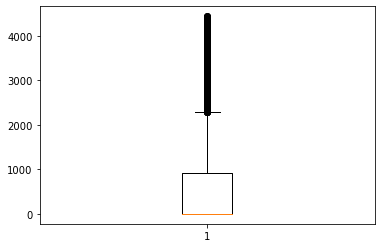

In [33]:
data.drop(data[data.CASH_ADVANCE>data.CASH_ADVANCE.mean()+3*data.CASH_ADVANCE.std()].index,inplace=True)
plt.show(plt.boxplot(data.CASH_ADVANCE))

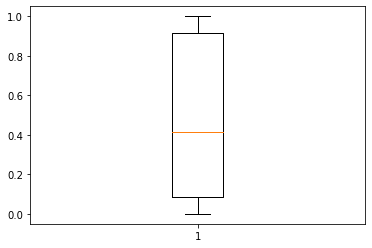

In [34]:
plt.show(plt.boxplot(data.PURCHASES_FREQUENCY))

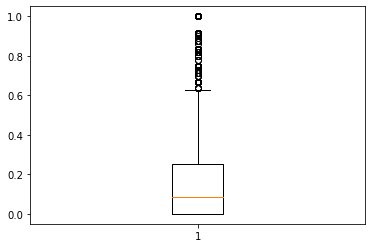

In [35]:
plt.show(plt.boxplot(data.ONEOFF_PURCHASES_FREQUENCY))

In [36]:
data.loc[data.ONEOFF_PURCHASES_FREQUENCY>=data.ONEOFF_PURCHASES_FREQUENCY.median()+3*data.ONEOFF_PURCHASES_FREQUENCY.std(),'ONEOFF_PURCHASES_FREQUENCY']=data.ONEOFF_PURCHASES_FREQUENCY.median()
plt.show(plt.boxplot(data.ONEOFF_PURCHASES_FREQUENCY))

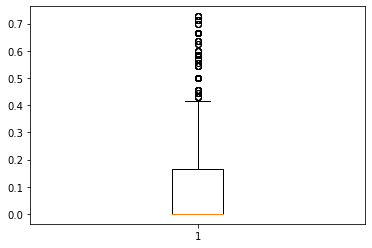

In [37]:
data.drop(data[data.ONEOFF_PURCHASES_FREQUENCY>data.ONEOFF_PURCHASES_FREQUENCY.median()+3*data.ONEOFF_PURCHASES_FREQUENCY.std()].index,inplace=True)
plt.show(plt.boxplot(data.ONEOFF_PURCHASES_FREQUENCY))

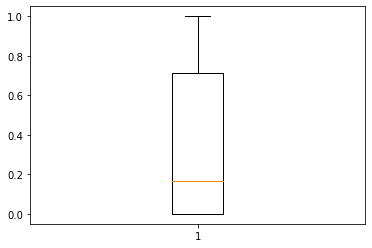

In [38]:
plt.show(plt.boxplot(data.PURCHASES_INSTALLMENTS_FREQUENCY))

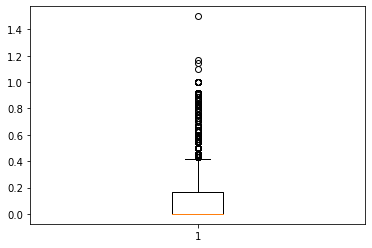

In [39]:
plt.show(plt.boxplot(data.CASH_ADVANCE_FREQUENCY))

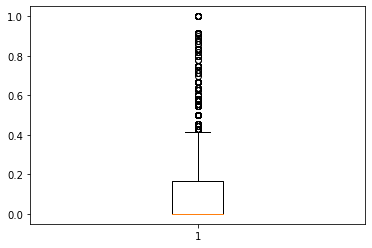

In [40]:
data.drop(data[data.CASH_ADVANCE_FREQUENCY>1.0].index,inplace=True)
plt.show(plt.boxplot(data.CASH_ADVANCE_FREQUENCY))

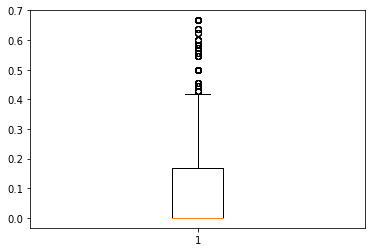

In [41]:
data.loc[data.CASH_ADVANCE_FREQUENCY>=data.CASH_ADVANCE_FREQUENCY.mean()+3*data.CASH_ADVANCE_FREQUENCY.std(),'CASH_ADVANCE_FREQUENCY']=data.CASH_ADVANCE_FREQUENCY.mean()
plt.show(plt.boxplot(data.CASH_ADVANCE_FREQUENCY))

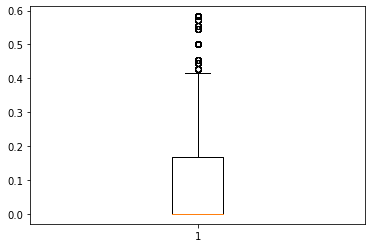

In [42]:
data.drop(data[data.CASH_ADVANCE_FREQUENCY>data.CASH_ADVANCE_FREQUENCY.mean()+3*data.CASH_ADVANCE_FREQUENCY.std()].index,inplace=True)
plt.show(plt.boxplot(data.CASH_ADVANCE_FREQUENCY))

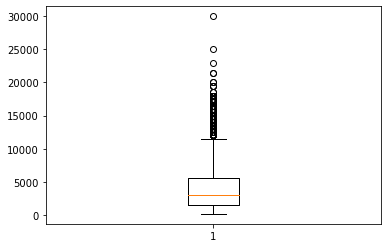

In [43]:
plt.show(plt.boxplot(data.CREDIT_LIMIT))

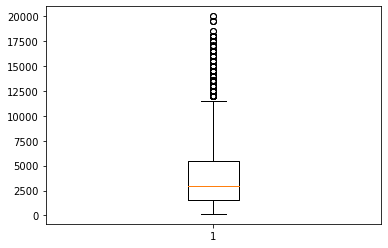

In [44]:
data.drop(data[data.CREDIT_LIMIT>20000].index,inplace=True)
plt.show(plt.boxplot(data.CREDIT_LIMIT))

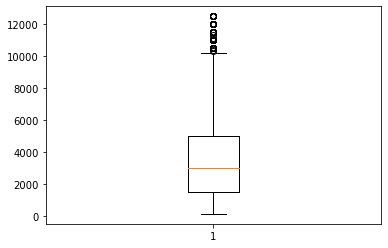

In [45]:
data.loc[data.CREDIT_LIMIT>=data.CREDIT_LIMIT.median()+3*data.CREDIT_LIMIT.std(),'CREDIT_LIMIT']=data.CREDIT_LIMIT.median()
plt.show(plt.boxplot(data.CREDIT_LIMIT))

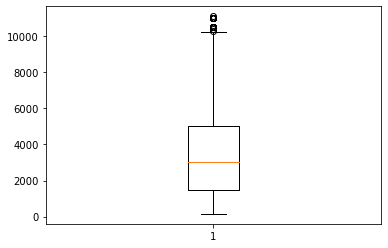

In [46]:
data.drop(data[data.CREDIT_LIMIT>data.CREDIT_LIMIT.median()+3*data.CREDIT_LIMIT.std()].index,inplace=True)
plt.show(plt.boxplot(data.CREDIT_LIMIT))

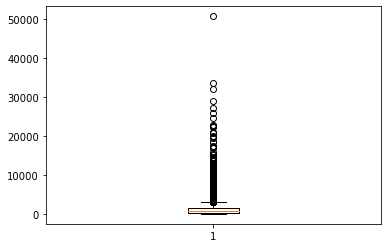

In [47]:
plt.show(plt.boxplot(data.PAYMENTS))

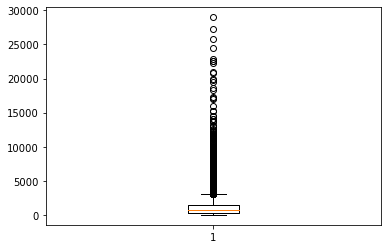

In [48]:
data.drop(data[data.PAYMENTS>30000].index,inplace=True)
plt.show(plt.boxplot(data.PAYMENTS))

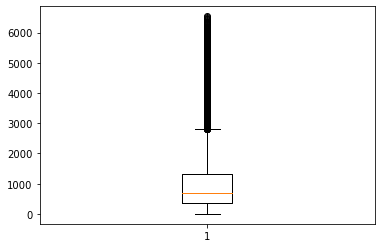

In [49]:
data.loc[data.PAYMENTS>data.PAYMENTS.median()+3*data.PAYMENTS.std(),'PAYMENTS']=data.PAYMENTS.median()
plt.show(plt.boxplot(data.PAYMENTS))

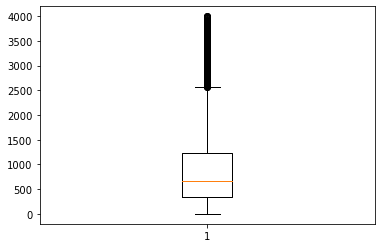

In [50]:
data.drop(data[data.PAYMENTS>data.PAYMENTS.median()+3*data.PAYMENTS.std()].index,inplace=True)
plt.show(plt.boxplot(data.PAYMENTS))

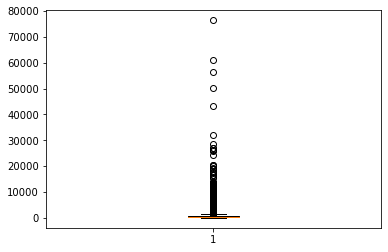

In [51]:
plt.show(plt.boxplot(data.MINIMUM_PAYMENTS))

In [52]:
data.drop(data[data.MINIMUM_PAYMENTS>40000].index,inplace=True)
plt.show(plt.boxplot(data.MINIMUM_PAYMENTS))

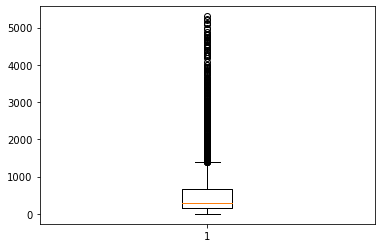

In [53]:
data.loc[data.MINIMUM_PAYMENTS>data.MINIMUM_PAYMENTS.median()+3*data.MINIMUM_PAYMENTS.std(),'MINIMUM_PAYMENTS']=data.MINIMUM_PAYMENTS.median()
plt.show(plt.boxplot(data.MINIMUM_PAYMENTS))

In [54]:
data.drop(data[data.MINIMUM_PAYMENTS>data.MINIMUM_PAYMENTS.median()+3*data.MINIMUM_PAYMENTS.std()].index,inplace=True)
plt.show(plt.boxplot(data.MINIMUM_PAYMENTS))

In [55]:
data.shape

(6525, 17)

In [56]:
data1=data

In [57]:
data1.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
7  1823.652743           1.000000     436.20              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   
7                   436.2      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
2                    0.083333                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
7                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
7                0.000000                 0             12        2300.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  201.802084        139.509787               0.0      12  
2  622.066742        627.284787               0.0      12  
3    0.000000        864.206542               0.0      12  
4  678.334763        244.791237               0.0      12  
7  679.065082        532.033990               0.0      12

In [58]:
data1.nunique()

BALANCE                             6477
BALANCE_FREQUENCY                     29
PURCHASES                           4416
ONEOFF_PURCHASES                    2585
INSTALLMENTS_PURCHASES              3050
CASH_ADVANCE                        2958
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            35
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                29
CASH_ADVANCE_TRX                      48
PURCHASES_TRX                        121
CREDIT_LIMIT                         134
PAYMENTS                            6253
MINIMUM_PAYMENTS                    6298
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

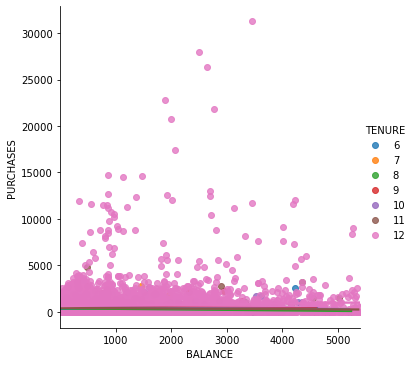

In [59]:
sns.lmplot(x='BALANCE',y='PURCHASES',data=data1,hue='TENURE')

In [60]:
sns.countplot(data1.TENURE)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TENURE', ylabel='count'>

In [61]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6525 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           6525 non-null   float64
 1   BALANCE_FREQUENCY                 6525 non-null   float64
 2   PURCHASES                         6525 non-null   float64
 3   ONEOFF_PURCHASES                  6525 non-null   float64
 4   INSTALLMENTS_PURCHASES            6525 non-null   float64
 5   CASH_ADVANCE                      6525 non-null   float64
 6   PURCHASES_FREQUENCY               6525 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        6525 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  6525 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            6525 non-null   float64
 10  CASH_ADVANCE_TRX                  6525 non-null   int64  
 11  PURCHASES_TRX                     6525 non-null   int64  
 12  CREDIT

In [62]:
data1.corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.346516   0.054687   
BALANCE_FREQUENCY                 0.346516           1.000000   0.079116   
PURCHASES                         0.054687           0.079116   1.000000   
ONEOFF_PURCHASES                  0.051597           0.060452   0.472128   
INSTALLMENTS_PURCHASES           -0.125560           0.082134   0.283832   
CASH_ADVANCE                      0.441037           0.061328  -0.106305   
PURCHASES_FREQUENCY              -0.211072           0.149030   0.367829   
ONEOFF_PURCHASES_FREQUENCY        0.037447           0.064398   0.321196   
PURCHASES_INSTALLMENTS_FREQUENCY -0.196298           0.128863   0.274737   
CASH_ADVANCE_FREQUENCY            0.423665           0.149195  -0.147746   
CASH_ADVANCE_TRX                  0.324972           0.105636  -0.093220   
PURCHASES_TRX                    -0.007857           0.142185   0.677406   
CREDIT_LIMIT                      0.302825           0.030576   0.203259   
PAYMENTS                          0.169242           0.054589   0.208613   
MINIMUM_PAYMENTS                  0.737904           0.290241   0.019034   
PRC_FULL_PAYMENT                 -0.393087          -0.190160   0.181404   
TENURE                            0.079756           0.119590   0.073442   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.051597               -0.125560   
BALANCE_FREQUENCY                         0.060452                0.082134   
PURCHASES                                 0.472128                0.283832   
ONEOFF_PURCHASES                          1.000000                0.125513   
INSTALLMENTS_PURCHASES                    0.125513                1.000000   
CASH_ADVANCE                             -0.113244               -0.197479   
PURCHASES_FREQUENCY                       0.275598                0.657099   
ONEOFF_PURCHASES_FREQUENCY                0.645316                0.094917   
PURCHASES_INSTALLMENTS_FREQUENCY          0.029397                0.726946   
CASH_ADVANCE_FREQUENCY                   -0.137085               -0.236510   
CASH_ADVANCE_TRX                         -0.093449               -0.153830   
PURCHASES_TRX                             0.390961                0.480406   
CREDIT_LIMIT                              0.220350                0.089803   
PAYMENTS                                  0.337684                0.178627   
MINIMUM_PAYMENTS                          0.022755               -0.052362   
PRC_FULL_PAYMENT                          0.041618                0.270005   
TENURE                                    0.060402                0.073495   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.441037            -0.211072   
BALANCE_FREQUENCY                     0.061328             0.149030   
PURCHASES                            -0.106305             0.367829   
ONEOFF_PURCHASES                     -0.113244             0.275598   
INSTALLMENTS_PURCHASES               -0.197479             0.657099   
CASH_ADVANCE                          1.000000            -0.328584   
PURCHASES_FREQUENCY                  -0.328584             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.108033             0.258205   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.276989             0.879853   
CASH_ADVANCE_FREQUENCY                0.646292            -0.380387   
CASH_ADVANCE_TRX                      0.563878            -0.255318   
PURCHASES_TRX                        -0.156230             0.611428   
CREDIT_LIMIT                          0.140741             0.066095   
PAYMENTS                              0.236814             0.088753   
MINIMUM_PAYMENTS                      0.341508            -0.115648   
PRC_FULL_PAYMENT                     -0.225016             0.333683   
TENURE                               -0.109145        

<AxesSubplot:>

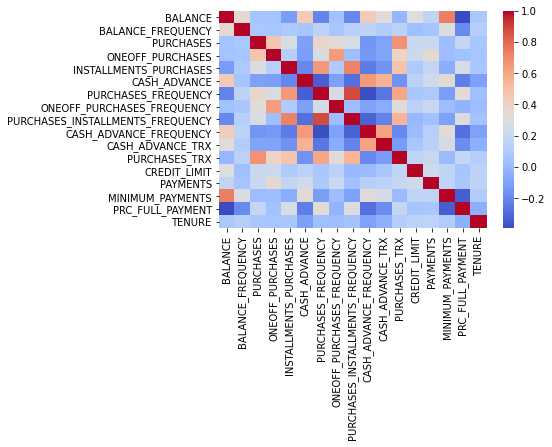

In [63]:
sns.heatmap(data1.corr(),cmap='coolwarm')

# CLUSTERING USING the Kmeans 

In [64]:
from sklearn.cluster import KMeans

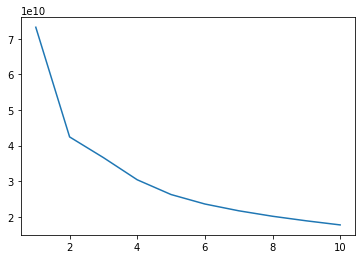

In [65]:
wcss=[]
for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(data1)
    wcss.append(clf.inertia_)
plt.plot(range(1,11),wcss)

In [66]:
from yellowbrick.cluster import KElbowVisualizer 

In [67]:
visual=KElbowVisualizer(KMeans(),k=(4,12),metric='silhouette')
visual.fit(data1)

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=None,
                 metric='silhouette')

In [68]:
from yellowbrick.cluster import SilhouetteVisualizer

In [69]:
silhouete=SilhouetteVisualizer(KMeans(9),colors='coolwarm')

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='coolwarm',
                     estimator=KMeans(n_clusters=9))

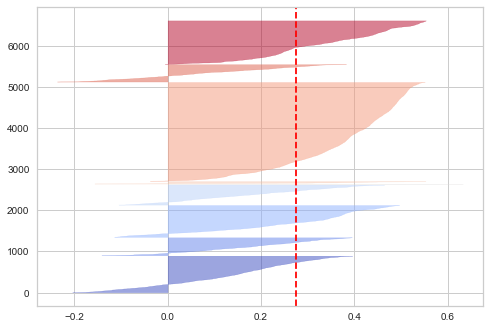

In [70]:
silhouete.fit(data1)

In [71]:
model=KMeans(n_clusters=5)
model.fit_predict(data1)

array([1, 2, 2, ..., 1, 1, 1])

In [72]:
model.labels_

array([1, 2, 2, ..., 1, 1, 1])

In [73]:
CLUST=pd.Series(model.labels_)
CLUST

0       1
1       2
2       2
3       1
4       1
       ..
6520    1
6521    1
6522    1
6523    1
6524    1
Length: 6525, dtype: int32

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

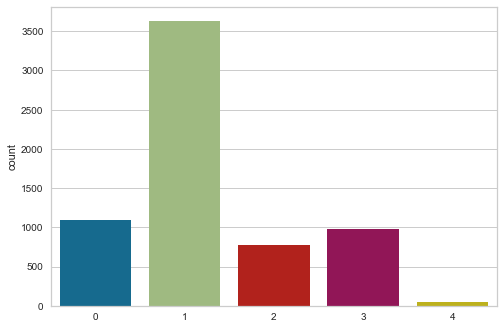

In [74]:
sns.countplot(CLUST)

In [75]:
data1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
7     1823.652743           1.000000     436.20              0.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
7                     436.20      0.000000             1.000000   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
2                       0.083333                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
7                       0.000000                          1.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
7                   0.000000                 0             12        2300.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     201.802084        139.509787              0.00      12  
2     622.066742        627.284787              0.00      12  
3       0.000000        864.206542              0.00      12  
4     678.334763        244.791237              0.00      12  
7     679.065082        532.033990              0.00      12  
...          ...               ...               ...     ...  
8945  325.594462         48.886365              0.50       6  
8946  275.861322        864.206542              0.00       6  
8947   81.270775   

In [76]:
data1.reset_index(drop=True, inplace=True)
data1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     2495.148862           1.000000     773.17            773.17   
2     1666.670542           0.636364    1499.00           1499.00   
3      817.714335           1.000000      16.00             16.00   
4     1823.652743           1.000000     436.20              0.00   
...           ...                ...        ...               ...   
6520    28.493517           1.000000     291.12              0.00   
6521    19.183215           1.000000     300.00              0.00   
6522    23.398673           0.833333     144.40              0.00   
6523    13.457564           0.833333       0.00              0.00   
6524   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00      0.000000             1.000000   
2                       0.00    205.788017             0.083333   
3                       0.00      0.000000             0.083333   
4                     436.20      0.000000             1.000000   
...                      ...           ...                  ...   
6520                  291.12      0.000000             1.000000   
6521                  300.00      0.000000             1.000000   
6522                  144.40      0.000000             0.833333   
6523                    0.00     36.558778             0.000000   
6524                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.083333                          0.000000   
2                       0.083333                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          1.000000   
...                          ...                               ...   
6520                    0.000000                          0.833333   
6521                    0.000000                          0.833333   
6522                    0.000000                          0.666667   
6523                    0.000000                          0.000000   
6524                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.000000                 0             12        7500.0   
2                   0.083333                 1              1        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0             12        2300.0   
...                      ...               ...            ...           ...   
6520                0.000000                 0              6        1000.0   
6521                0.000000                 0              6        1000.0   
6522                0.000000                 0              5        1000.0   
6523                0.166667                 2              0         500.0   
6524                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     201.802084        139.509787              0.00      12  
1     622.066742        627.284787              0.00      12  
2       0.000000        864.206542              0.00      12  
3     678.334763        244.791237              0.00      12  
4     679.065082        532.033990              0.00      12  
...          ...               ...               ...     ...  
6520  325.594462         48.886365              0.50       6  
6521  275.861322        864.206542              0.00       6  
6522   81.270775   

In [77]:
from sklearn.metrics import silhouette_score

In [78]:
data1.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [79]:
from sklearn import preprocessing

In [80]:
data_norm=data1.iloc[:,[0,2,3,4,5,-6,-5,-4,]]
data_norm

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0       40.900749      95.40              0.00                   95.40   
1     2495.148862     773.17            773.17                    0.00   
2     1666.670542    1499.00           1499.00                    0.00   
3      817.714335      16.00             16.00                    0.00   
4     1823.652743     436.20              0.00                  436.20   
...           ...        ...               ...                     ...   
6520    28.493517     291.12              0.00                  291.12   
6521    19.183215     300.00              0.00                  300.00   
6522    23.398673     144.40              0.00                  144.40   
6523    13.457564       0.00              0.00                    0.00   
6524   372.708075    1093.25           1093.25                    0.00   

      CASH_ADVANCE  PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  
0         0.000000              2        1000.0  201.802084  
1         0.000000             12        7500.0  622.066742  
2       205.788017              1        7500.0    0.000000  
3         0.000000              1        1200.0  678.334763  
4         0.000000             12        2300.0  679.065082  
...            ...            ...           ...         ...  
6520      0.000000              6        1000.0  325.594462  
6521      0.000000              6        1000.0  275.861322  
6522      0.000000              5        1000.0   81.270775  
6523     36.558778              0         500.0   52.549959  
6524    127.040008             23        1200.0   63.165404  

[6525 rows x 8 columns]

In [81]:
data_un=data1.iloc[:,[1,6,7,8,9,10,11,15,16]]
data_un

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0              0.818182             0.166667                    0.000000   
1              1.000000             1.000000                    0.083333   
2              0.636364             0.083333                    0.083333   
3              1.000000             0.083333                    0.083333   
4              1.000000             1.000000                    0.000000   
...                 ...                  ...                         ...   
6520           1.000000             1.000000                    0.000000   
6521           1.000000             1.000000                    0.000000   
6522           0.833333             0.833333                    0.000000   
6523           0.833333             0.000000                    0.000000   
6524           0.666667             0.666667                    0.666667   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0                             0.083333                0.000000   
1                             0.000000                0.000000   
2                             0.000000                0.083333   
3                             0.000000                0.000000   
4                             1.000000                0.000000   
...                                ...                     ...   
6520                          0.833333                0.000000   
6521                          0.833333                0.000000   
6522                          0.666667                0.000000   
6523                          0.000000                0.166667   
6524                          0.000000                0.333333   

      CASH_ADVANCE_TRX  PURCHASES_TRX  PRC_FULL_PAYMENT  TENURE  
0                    0              2              0.00      12  
1                    0             12              0.00      12  
2                    1              1              0.00      12  
3                    0              1              0.00      12  
4                    0             12              0.00      12  
...                ...            ...               ...     ...  
6520                 0              6              0.50       6  
6521                 0              6              0.00       6  
6522                 0              5              0.25       6  
6523                 2              0              0.25       6  
6524                 2             23              0.00       6  

[6525 rows x 9 columns]

In [82]:
scale=preprocessing.StandardScaler()
data_norm=pd.DataFrame(scale.fit_transform(data_norm),columns=['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS'])
data_norm


BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    -0.866502  -0.401633         -0.564741               -0.408197   
1     1.228237   0.100757          0.963382               -0.701674   
2     0.521118   0.638771          2.397940               -0.701674   
3    -0.203480  -0.460488         -0.533118               -0.701674   
4     0.655104  -0.149019         -0.564741                0.640196   
...        ...        ...               ...                     ...   
6520 -0.877092  -0.256558         -0.564741                0.193890   
6521 -0.885038  -0.249976         -0.564741                0.221207   
6522 -0.881441  -0.365313         -0.564741               -0.257460   
6523 -0.889925  -0.472348         -0.564741               -0.701674   
6524 -0.583300   0.338013          1.596000               -0.701674   

      CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  
0        -0.589212     -0.521421 -0.991590         -0.867796  
1        -0.589212      0.089751  1.656419         -0.339016  
2        -0.365178     -0.582538  1.656419         -1.121706  
3        -0.589212     -0.582538 -0.910113         -0.268219  
4        -0.589212      0.089751 -0.461988         -0.267300  
...            ...           ...       ...               ...  
6520     -0.589212     -0.276952 -0.991590         -0.712040  
6521     -0.589212     -0.276952 -0.991590         -0.774614  
6522     -0.589212     -0.338070 -0.991590         -1.019450  
6523     -0.549412     -0.643656 -1.195283         -1.055587  
6524     -0.450908      0.762040 -0.910113         -1.042230  

[6525 rows x 8 columns]

In [83]:
data_std=pd.concat([data_norm,data_un],axis=1)
data_std

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    -0.866502  -0.401633         -0.564741               -0.408197   
1     1.228237   0.100757          0.963382               -0.701674   
2     0.521118   0.638771          2.397940               -0.701674   
3    -0.203480  -0.460488         -0.533118               -0.701674   
4     0.655104  -0.149019         -0.564741                0.640196   
...        ...        ...               ...                     ...   
6520 -0.877092  -0.256558         -0.564741                0.193890   
6521 -0.885038  -0.249976         -0.564741                0.221207   
6522 -0.881441  -0.365313         -0.564741               -0.257460   
6523 -0.889925  -0.472348         -0.564741               -0.701674   
6524 -0.583300   0.338013          1.596000               -0.701674   

      CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0        -0.589212     -0.521421 -0.991590         -0.867796   
1        -0.589212      0.089751  1.656419         -0.339016   
2        -0.365178     -0.582538  1.656419         -1.121706   
3        -0.589212     -0.582538 -0.910113         -0.268219   
4        -0.589212      0.089751 -0.461988         -0.267300   
...            ...           ...       ...               ...   
6520     -0.589212     -0.276952 -0.991590         -0.712040   
6521     -0.589212     -0.276952 -0.991590         -0.774614   
6522     -0.589212     -0.338070 -0.991590         -1.019450   
6523     -0.549412     -0.643656 -1.195283         -1.055587   
6524     -0.450908      0.762040 -0.910113         -1.042230   

      BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0              0.818182             0.166667                    0.000000   
1              1.000000             1.000000                    0.083333   
2              0.636364             0.083333                    0.083333   
3              1.000000             0.083333                    0.083333   
4              1.000000             1.000000                    0.000000   
...                 ...                  ...                         ...   
6520           1.000000             1.000000                    0.000000   
6521           1.000000             1.000000                    0.000000   
6522           0.833333             0.833333                    0.000000   
6523           0.833333             0.000000                    0.000000   
6524           0.666667             0.666667                    0.666667   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0                             0.083333                0.000000   
1                             0.000000                0.000000   
2                             0.000000                0.083333   
3                             0.000000                0.000000   
4                             1.000000                0.000000   
...                                ...                     ...   
6520                          0.833333                0.000000   
6521                          0.833333                0.000000   
6522                          0.666667                0.000000   
6523                          0.000000                0.166667   
6524                          0.000000                0.333333   

      CASH_ADVANCE_TRX  PURCHASES_TRX  PRC_FULL_PAYMENT  TENURE  
0                    0              2              0.00      12  
1                    0             12              0.00      12  
2                    1              1              0.00      12  
3                    0              1              0.00      12  
4                    0             12              0.00      12  
...                ...            ...               ...     ...  
6520                 0              6              0.50       6  
6521                 0              6              0.00       6  
6522                 0              5              0.25       6  
6523               

In [84]:
data_std.isna().sum()

BALANCE                             0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
BALANCE_FREQUENCY                   0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

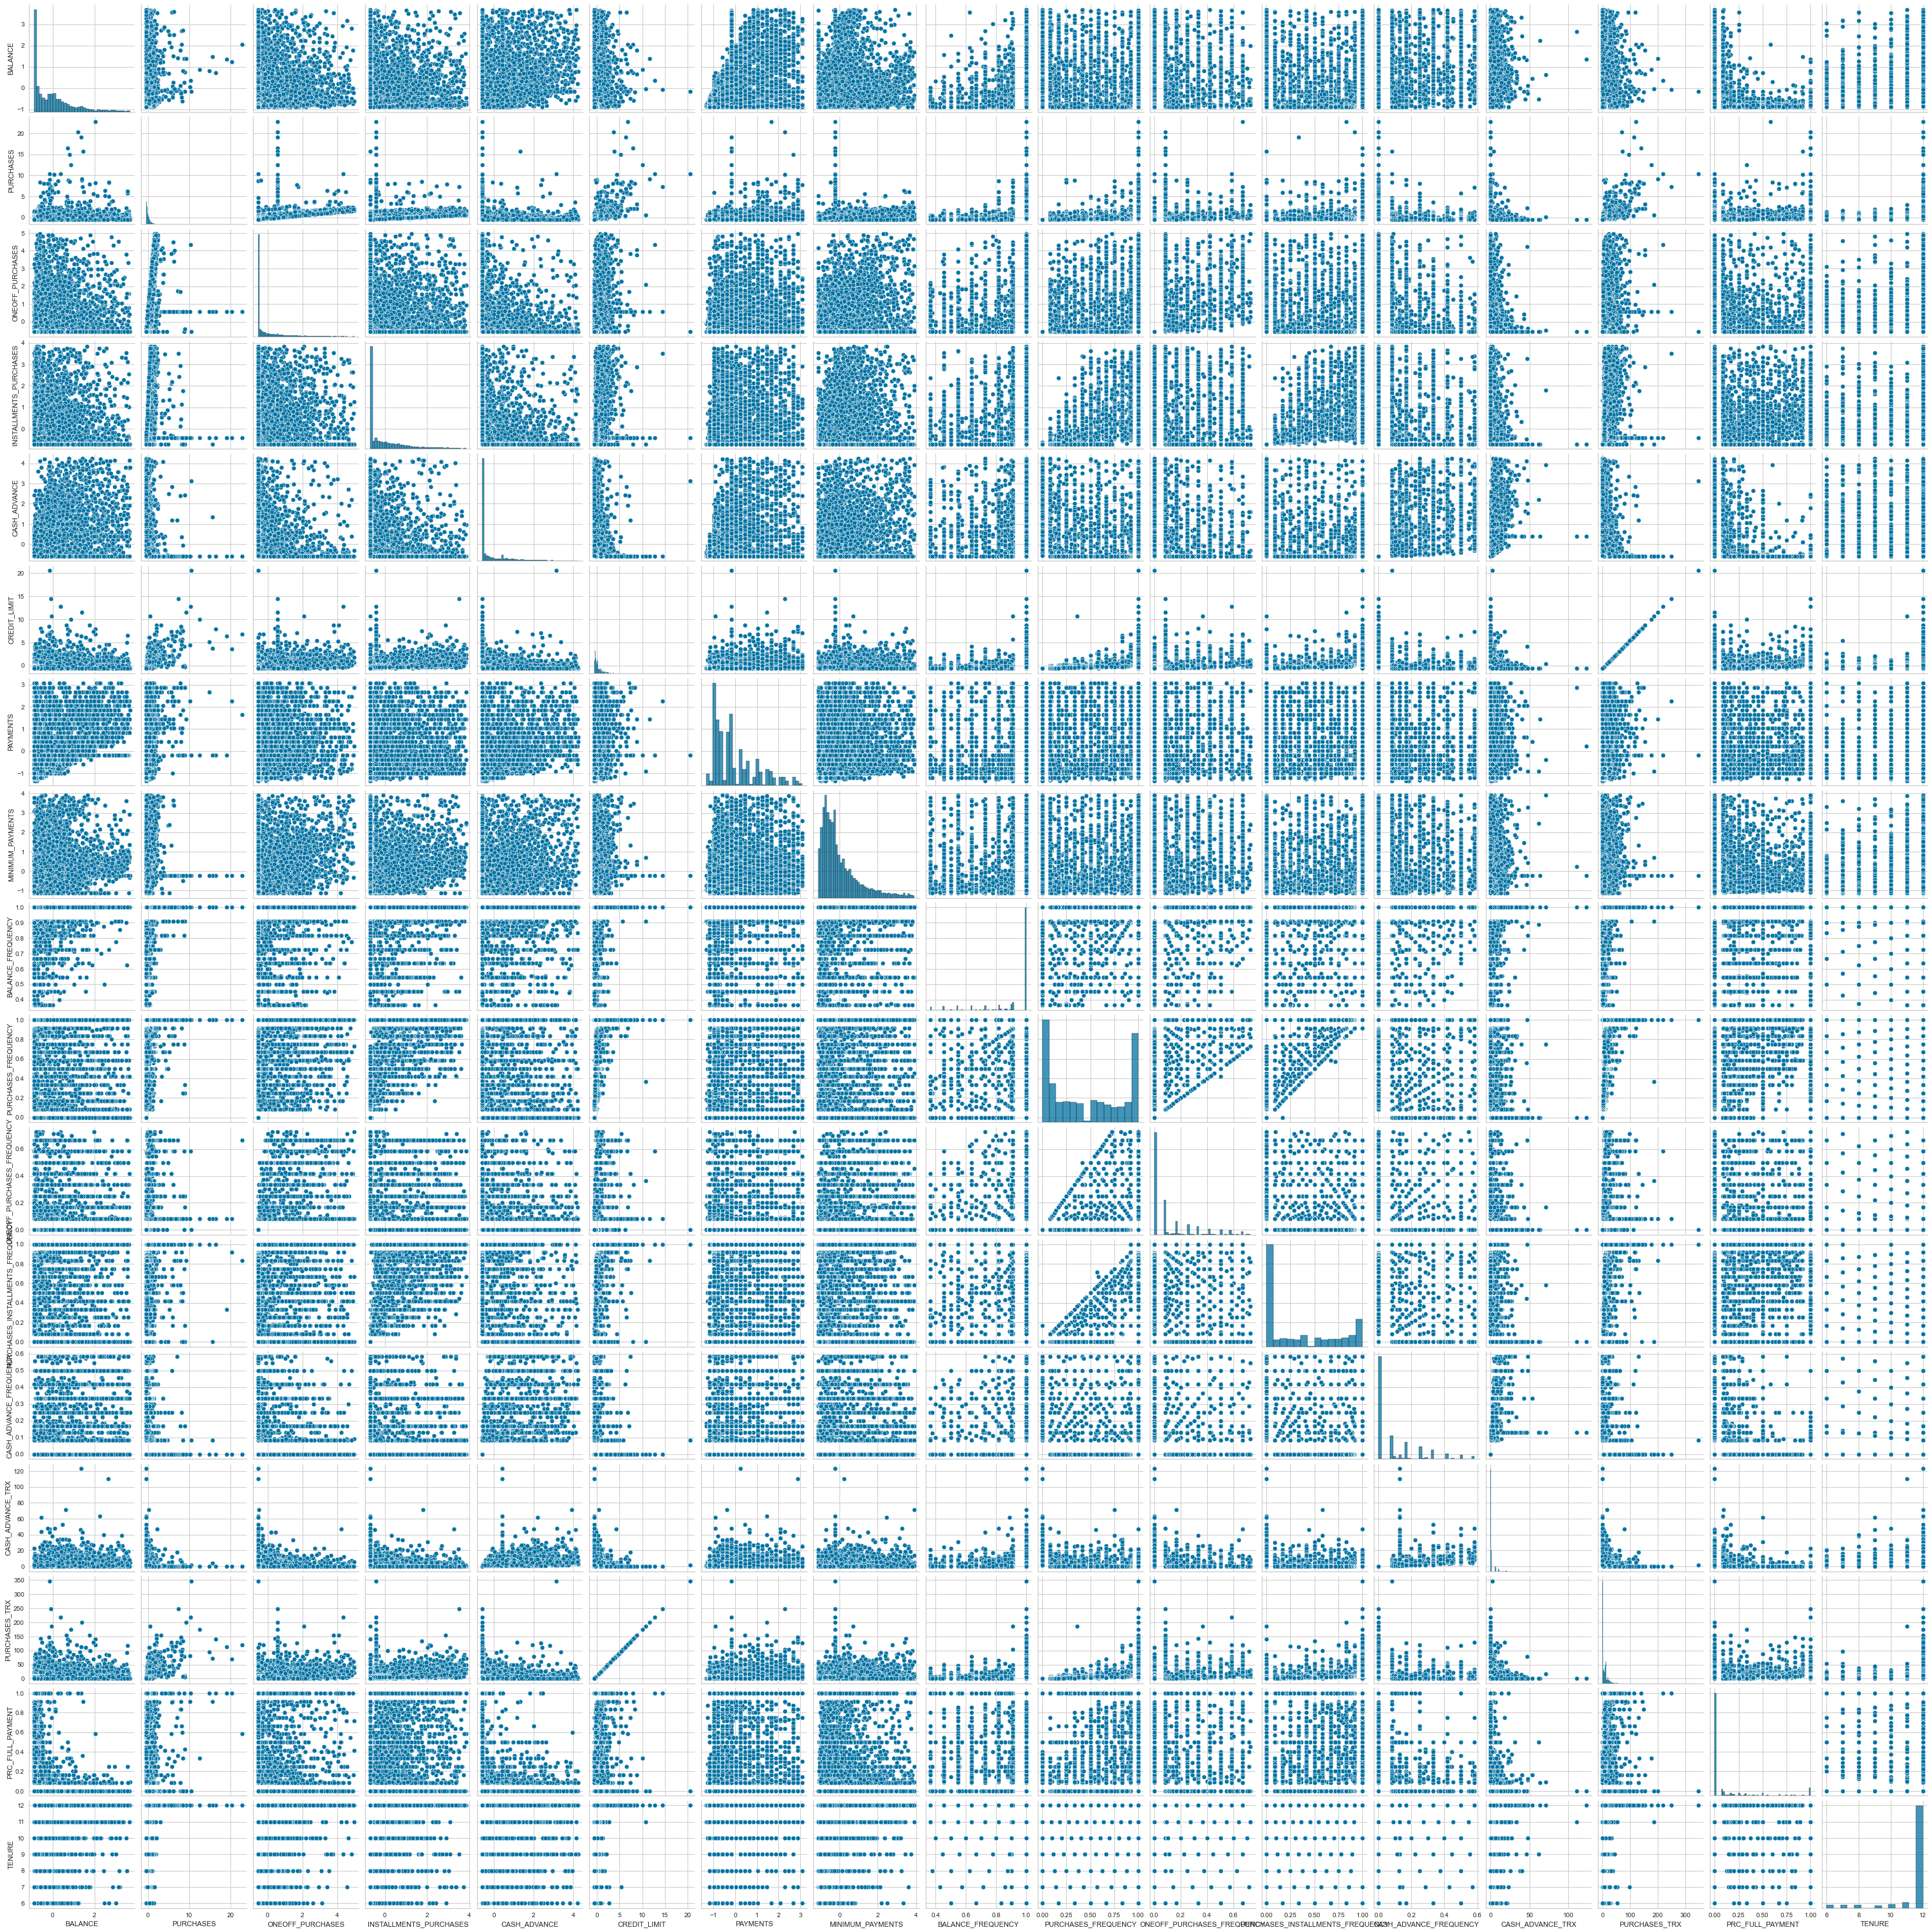

In [85]:
sns.pairplot(data_std)

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=None,
                 metric='silhouette')

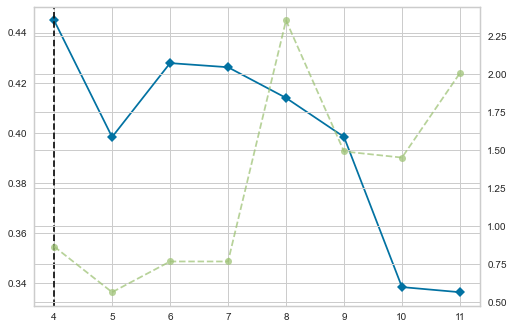

In [86]:
visual=KElbowVisualizer(KMeans(),k=(4,12),metric='silhouette')
visual.fit(data_std)

In [87]:
model1=KMeans(n_clusters=4)
model1.fit(data_std)

KMeans(n_clusters=4)

In [88]:
model1.labels_

array([0, 3, 0, ..., 0, 0, 3])

In [89]:
silhouette_score(data_std,model1.labels_)

0.44489435910221536

In [90]:
data_std['kmeans']=pd.Series(model1.labels_)
data_std

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    -0.866502  -0.401633         -0.564741               -0.408197   
1     1.228237   0.100757          0.963382               -0.701674   
2     0.521118   0.638771          2.397940               -0.701674   
3    -0.203480  -0.460488         -0.533118               -0.701674   
4     0.655104  -0.149019         -0.564741                0.640196   
...        ...        ...               ...                     ...   
6520 -0.877092  -0.256558         -0.564741                0.193890   
6521 -0.885038  -0.249976         -0.564741                0.221207   
6522 -0.881441  -0.365313         -0.564741               -0.257460   
6523 -0.889925  -0.472348         -0.564741               -0.701674   
6524 -0.583300   0.338013          1.596000               -0.701674   

      CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0        -0.589212     -0.521421 -0.991590         -0.867796   
1        -0.589212      0.089751  1.656419         -0.339016   
2        -0.365178     -0.582538  1.656419         -1.121706   
3        -0.589212     -0.582538 -0.910113         -0.268219   
4        -0.589212      0.089751 -0.461988         -0.267300   
...            ...           ...       ...               ...   
6520     -0.589212     -0.276952 -0.991590         -0.712040   
6521     -0.589212     -0.276952 -0.991590         -0.774614   
6522     -0.589212     -0.338070 -0.991590         -1.019450   
6523     -0.549412     -0.643656 -1.195283         -1.055587   
6524     -0.450908      0.762040 -0.910113         -1.042230   

      BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0              0.818182             0.166667                    0.000000   
1              1.000000             1.000000                    0.083333   
2              0.636364             0.083333                    0.083333   
3              1.000000             0.083333                    0.083333   
4              1.000000             1.000000                    0.000000   
...                 ...                  ...                         ...   
6520           1.000000             1.000000                    0.000000   
6521           1.000000             1.000000                    0.000000   
6522           0.833333             0.833333                    0.000000   
6523           0.833333             0.000000                    0.000000   
6524           0.666667             0.666667                    0.666667   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0                             0.083333                0.000000   
1                             0.000000                0.000000   
2                             0.000000                0.083333   
3                             0.000000                0.000000   
4                             1.000000                0.000000   
...                                ...                     ...   
6520                          0.833333                0.000000   
6521                          0.833333                0.000000   
6522                          0.666667                0.000000   
6523                          0.000000                0.166667   
6524                          0.000000                0.333333   

      CASH_ADVANCE_TRX  PURCHASES_TRX  PRC_FULL_PAYMENT  TENURE  kmeans  
0                    0              2              0.00      12       0  
1                    0             12              0.00      12       3  
2                    1              1              0.00      12       0  
3                    0              1              0.00      12       0  
4                    0             12              0.00      12       3  
...                ...            ...               ...     ...     ...  
6520                 0              6              0.50       6       0  
6521                 0              6              0.00       6       0  
6522         

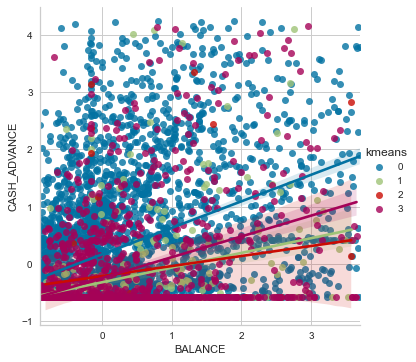

In [92]:
sns.lmplot(x='BALANCE',y='CASH_ADVANCE',hue='kmeans',data=data_std)

# kmeans clustering using the normalization

In [93]:
data2=data1.iloc[:,[0,2,3,4,5,-6,-5,-4,]]
data2

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0       40.900749      95.40              0.00                   95.40   
1     2495.148862     773.17            773.17                    0.00   
2     1666.670542    1499.00           1499.00                    0.00   
3      817.714335      16.00             16.00                    0.00   
4     1823.652743     436.20              0.00                  436.20   
...           ...        ...               ...                     ...   
6520    28.493517     291.12              0.00                  291.12   
6521    19.183215     300.00              0.00                  300.00   
6522    23.398673     144.40              0.00                  144.40   
6523    13.457564       0.00              0.00                    0.00   
6524   372.708075    1093.25           1093.25                    0.00   

      CASH_ADVANCE  PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  
0         0.000000              2        1000.0  201.802084  
1         0.000000             12        7500.0  622.066742  
2       205.788017              1        7500.0    0.000000  
3         0.000000              1        1200.0  678.334763  
4         0.000000             12        2300.0  679.065082  
...            ...            ...           ...         ...  
6520      0.000000              6        1000.0  325.594462  
6521      0.000000              6        1000.0  275.861322  
6522      0.000000              5        1000.0   81.270775  
6523     36.558778              0         500.0   52.549959  
6524    127.040008             23        1200.0   63.165404  

[6525 rows x 8 columns]

In [94]:
scale2=preprocessing.MinMaxScaler()
data2_norm=pd.DataFrame(scale2.fit_transform(data2),columns=['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS'])
data2_norm

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0     0.007584   0.003048          0.000000                0.064548   
1     0.462724   0.024702          0.277137                0.000000   
2     0.309083   0.047892          0.537305                0.000000   
3     0.151644   0.000511          0.005735                0.000000   
4     0.338195   0.013936          0.000000                0.295135   
...        ...        ...               ...                     ...   
6520  0.005283   0.009301          0.000000                0.196973   
6521  0.003557   0.009585          0.000000                0.202981   
6522  0.004338   0.004614          0.000000                0.097702   
6523  0.002495   0.000000          0.000000                0.000000   
6524  0.069118   0.034929          0.391867                0.000000   

      CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  
0         0.000000      0.005764  0.078341          0.050482  
1         0.000000      0.034582  0.677419          0.155613  
2         0.046383      0.002882  0.677419          0.000000  
3         0.000000      0.002882  0.096774          0.169688  
4         0.000000      0.034582  0.198157          0.169871  
...            ...           ...       ...               ...  
6520      0.000000      0.017291  0.078341          0.081449  
6521      0.000000      0.017291  0.078341          0.069008  
6522      0.000000      0.014409  0.078341          0.020330  
6523      0.008240      0.000000  0.032258          0.013146  
6524      0.028634      0.066282  0.096774          0.015801  

[6525 rows x 8 columns]

In [95]:
data_norm_final=pd.concat([data2_norm,data_un],axis=1)
data_norm_final

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0     0.007584   0.003048          0.000000                0.064548   
1     0.462724   0.024702          0.277137                0.000000   
2     0.309083   0.047892          0.537305                0.000000   
3     0.151644   0.000511          0.005735                0.000000   
4     0.338195   0.013936          0.000000                0.295135   
...        ...        ...               ...                     ...   
6520  0.005283   0.009301          0.000000                0.196973   
6521  0.003557   0.009585          0.000000                0.202981   
6522  0.004338   0.004614          0.000000                0.097702   
6523  0.002495   0.000000          0.000000                0.000000   
6524  0.069118   0.034929          0.391867                0.000000   

      CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0         0.000000      0.005764  0.078341          0.050482   
1         0.000000      0.034582  0.677419          0.155613   
2         0.046383      0.002882  0.677419          0.000000   
3         0.000000      0.002882  0.096774          0.169688   
4         0.000000      0.034582  0.198157          0.169871   
...            ...           ...       ...               ...   
6520      0.000000      0.017291  0.078341          0.081449   
6521      0.000000      0.017291  0.078341          0.069008   
6522      0.000000      0.014409  0.078341          0.020330   
6523      0.008240      0.000000  0.032258          0.013146   
6524      0.028634      0.066282  0.096774          0.015801   

      BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0              0.818182             0.166667                    0.000000   
1              1.000000             1.000000                    0.083333   
2              0.636364             0.083333                    0.083333   
3              1.000000             0.083333                    0.083333   
4              1.000000             1.000000                    0.000000   
...                 ...                  ...                         ...   
6520           1.000000             1.000000                    0.000000   
6521           1.000000             1.000000                    0.000000   
6522           0.833333             0.833333                    0.000000   
6523           0.833333             0.000000                    0.000000   
6524           0.666667             0.666667                    0.666667   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0                             0.083333                0.000000   
1                             0.000000                0.000000   
2                             0.000000                0.083333   
3                             0.000000                0.000000   
4                             1.000000                0.000000   
...                                ...                     ...   
6520                          0.833333                0.000000   
6521                          0.833333                0.000000   
6522                          0.666667                0.000000   
6523                          0.000000                0.166667   
6524                          0.000000                0.333333   

      CASH_ADVANCE_TRX  PURCHASES_TRX  PRC_FULL_PAYMENT  TENURE  
0                    0              2              0.00      12  
1                    0             12              0.00      12  
2                    1              1              0.00      12  
3                    0              1              0.00      12  
4                    0             12              0.00      12  
...                ...            ...               ...     ...  
6520                 0              6              0.50       6  
6521                 0              6              0.00       6  
6522                 0              5              0.25       6  
6523               

In [96]:
visual=KElbowVisualizer(KMeans(),k=(4,12),metric='silhouette')

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=None,
                 metric='silhouette')

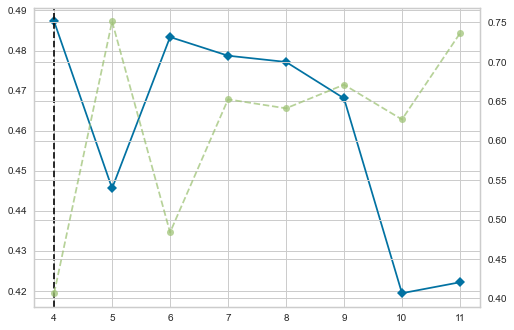

In [97]:
visual.fit(data_norm_final)

In [98]:
model2=KMeans(4)
model2.fit(data_norm_final)

KMeans(n_clusters=4)

In [99]:
kmeans_norm=pd.Series(model2.labels_)

In [100]:
data_norm_final

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0     0.007584   0.003048          0.000000                0.064548   
1     0.462724   0.024702          0.277137                0.000000   
2     0.309083   0.047892          0.537305                0.000000   
3     0.151644   0.000511          0.005735                0.000000   
4     0.338195   0.013936          0.000000                0.295135   
...        ...        ...               ...                     ...   
6520  0.005283   0.009301          0.000000                0.196973   
6521  0.003557   0.009585          0.000000                0.202981   
6522  0.004338   0.004614          0.000000                0.097702   
6523  0.002495   0.000000          0.000000                0.000000   
6524  0.069118   0.034929          0.391867                0.000000   

      CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0         0.000000      0.005764  0.078341          0.050482   
1         0.000000      0.034582  0.677419          0.155613   
2         0.046383      0.002882  0.677419          0.000000   
3         0.000000      0.002882  0.096774          0.169688   
4         0.000000      0.034582  0.198157          0.169871   
...            ...           ...       ...               ...   
6520      0.000000      0.017291  0.078341          0.081449   
6521      0.000000      0.017291  0.078341          0.069008   
6522      0.000000      0.014409  0.078341          0.020330   
6523      0.008240      0.000000  0.032258          0.013146   
6524      0.028634      0.066282  0.096774          0.015801   

      BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0              0.818182             0.166667                    0.000000   
1              1.000000             1.000000                    0.083333   
2              0.636364             0.083333                    0.083333   
3              1.000000             0.083333                    0.083333   
4              1.000000             1.000000                    0.000000   
...                 ...                  ...                         ...   
6520           1.000000             1.000000                    0.000000   
6521           1.000000             1.000000                    0.000000   
6522           0.833333             0.833333                    0.000000   
6523           0.833333             0.000000                    0.000000   
6524           0.666667             0.666667                    0.666667   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0                             0.083333                0.000000   
1                             0.000000                0.000000   
2                             0.000000                0.083333   
3                             0.000000                0.000000   
4                             1.000000                0.000000   
...                                ...                     ...   
6520                          0.833333                0.000000   
6521                          0.833333                0.000000   
6522                          0.666667                0.000000   
6523                          0.000000                0.166667   
6524                          0.000000                0.333333   

      CASH_ADVANCE_TRX  PURCHASES_TRX  PRC_FULL_PAYMENT  TENURE  
0                    0              2              0.00      12  
1                    0             12              0.00      12  
2                    1              1              0.00      12  
3                    0              1              0.00      12  
4                    0             12              0.00      12  
...                ...            ...               ...     ...  
6520                 0              6              0.50       6  
6521                 0              6              0.00       6  
6522                 0              5              0.25       6  
6523               

In [101]:
silhouette_score(data_norm_final,kmeans_norm)

0.48516087354385606

In [102]:
data_norm_final['kmeans_norm'] = kmeans_norm
data_norm_final

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0     0.007584   0.003048          0.000000                0.064548   
1     0.462724   0.024702          0.277137                0.000000   
2     0.309083   0.047892          0.537305                0.000000   
3     0.151644   0.000511          0.005735                0.000000   
4     0.338195   0.013936          0.000000                0.295135   
...        ...        ...               ...                     ...   
6520  0.005283   0.009301          0.000000                0.196973   
6521  0.003557   0.009585          0.000000                0.202981   
6522  0.004338   0.004614          0.000000                0.097702   
6523  0.002495   0.000000          0.000000                0.000000   
6524  0.069118   0.034929          0.391867                0.000000   

      CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0         0.000000      0.005764  0.078341          0.050482   
1         0.000000      0.034582  0.677419          0.155613   
2         0.046383      0.002882  0.677419          0.000000   
3         0.000000      0.002882  0.096774          0.169688   
4         0.000000      0.034582  0.198157          0.169871   
...            ...           ...       ...               ...   
6520      0.000000      0.017291  0.078341          0.081449   
6521      0.000000      0.017291  0.078341          0.069008   
6522      0.000000      0.014409  0.078341          0.020330   
6523      0.008240      0.000000  0.032258          0.013146   
6524      0.028634      0.066282  0.096774          0.015801   

      BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0              0.818182             0.166667                    0.000000   
1              1.000000             1.000000                    0.083333   
2              0.636364             0.083333                    0.083333   
3              1.000000             0.083333                    0.083333   
4              1.000000             1.000000                    0.000000   
...                 ...                  ...                         ...   
6520           1.000000             1.000000                    0.000000   
6521           1.000000             1.000000                    0.000000   
6522           0.833333             0.833333                    0.000000   
6523           0.833333             0.000000                    0.000000   
6524           0.666667             0.666667                    0.666667   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0                             0.083333                0.000000   
1                             0.000000                0.000000   
2                             0.000000                0.083333   
3                             0.000000                0.000000   
4                             1.000000                0.000000   
...                                ...                     ...   
6520                          0.833333                0.000000   
6521                          0.833333                0.000000   
6522                          0.666667                0.000000   
6523                          0.000000                0.166667   
6524                          0.000000                0.333333   

      CASH_ADVANCE_TRX  PURCHASES_TRX  PRC_FULL_PAYMENT  TENURE  kmeans_norm  
0                    0              2              0.00      12            0  
1                    0             12              0.00      12            3  
2                    1              1              0.00      12            0  
3                    0              1              0.00      12            0  
4                    0             12              0.00      12            3  
...                ...            ...               ...     ...          ...  
6520                 0              6              0.50       6            0  
6521                 0              6          